# Lab 3: Numerical Derivatives

Physics is dominated by differential equations, from Newton's 2nd law,

$$ F = m \frac{d^2 x}{d t^2}$$

to the time-dependent Schrodinger equation,

$$ \frac{\partial \Psi}{\partial t} = E.$$

Before we can tackle differential equations, we must first figure out how to use the computer to compute $derivatives$ themselves. In order to do calculus (both differential and integral) on the computer, we have to realize that all the computer can do is arithmatic: addition, subtraction, multiplication, and division. It is our job to construct accurate, stable algorithms that express approximations to derivatives and integrals using arithmetic statements.

## A simple approach: the forward difference algorithm

Our first approach is to use the definition of the derivative,

$$\frac{d f}{d x} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h},$$

combined with a Taylor expansion for the point $f(x+h)$:

$$ f(x+h) = f(x) + h f'(x) + \frac{h^2 f''(x)}{2!} + \frac{h^3 f'''(x)}{3!} + \ldots.$$

Rearrange the Taylor expansion to come up with a form for the derivative $f'(x)$ (here, unlike last week, the prime *does* mean differentiation). If we *truncate* the Taylor series at the second derivative term, we end up with 

$$f'(x) = \frac{f(x+h) - f(x)}{h} + \mathcal{O}(h),$$

where the $\mathcal{O}(h)$ symbol tells us that the **truncation error** is at most an unknown constant times $h$. Ignoring that term, we now have exactly what we're looking for: a series of pure arithmatic operations that give us an approximation to the derivative $f'(x)$. We can also write this as $f'(x) \simeq \frac{f(x+h) - f(x)}{h}$, since without the truncation error term, it is only approximate. Because $\mathcal{O}(h)$ is proportional to the first power of $h$, this is called a **first-order approximation**. Becuase this particular first order approximation uses two points, one of which is ahead of the position at which it gives the derivative, this is called the **forward difference algorithm** for computing a derivative.

Truncation error is a new type of error that we haven't met yet. It is fairly simple to understand: even if we had a perfect computer that could represent floating point numbers exactly, this approximation would *still* have an error in our computed derivative $f'(x)$ because the true derivative is the sum of an infinite Taylor series. However, here, we just got lazy, truncated the series after the first two terms, and rearranged the equation to get $f'(x)$ on the left hand side. 

Of course, in any practical computation you will ever do, you will have **both** truncation error and roundoff error from fininte precision. In order to see if our first order approximation is a good one, consider 

$$ f(x) = a + b x^2.$$

First, by hand take the exact, analytic derivative of this function; write it as $f'(x)$. Write it in the cell below using $\LaTeX$.

$$\frac{d}{dx}f(x) = \frac{d}{dx}(a+bx^2)$$
$$f'(x) = 2bx$$

Now, using $f'_{f}(x) = f(x+h) - f(x)/h$, compute the forward difference approximation to the derivative. Write it below as $f'_f(x)$, and show your work.

$$f'_{f}(x) = \frac{f(x+h) - f(x)}{h}$$
$$f'_{f}(x) = \frac{a +b(x+h)^2 - (a+bx^2)}{h}$$
$$f'_{f}(x) = \frac{a +b(x^2+2xh+h^2) - a-bx^2}{h}$$
$$f'_{f}(x) = \frac{a +bx^2+2bxh+h^2 - a-bx^2}{h}$$
$$f'_{f}(x) = \frac{2bxh+bh^2 }{h}$$
$$f'_{f}(x) = \frac{h(2bx+bh) }{h}$$
$$f'_{f}(x) = 2bx+bh$$


Is the error term as you expected from the Taylor series you used to derive the forward difference approximation in the first place? When would this approximation be a good one? 

This example shows that the first order method requires very small $h$ before it will be a good approximation.  *However*, as you start making $h$ smaller, the numerator of the approximation will start to suffer from our old foe subtractive cancellation, since $f(x+h) \simeq f(x)$. 

Yes this error is what we would expect. It is linear with $h$. Also if we go through and calculate $\mathcal{O}(h)$ we get $-bh$ which makes sense as our error comes from leaving out $\mathcal{O}(h)$, the higher order terms.

## Central Difference Approximation

We can improve on our approximation by combining more points into the method. Instead of using $x$ and $x+h$, we can use $x-h/2$ and $x+h/2$ to construct a *central difference* algorithm:

$$f'_{cd}(x) \equiv \frac{f(x+h/2) - f(x-h/2)}{h}.$$

Let's find the trunctation error for the central difference method by Taylor expanding *both* $f(x + h/2)$ and $f(x-h/2)$ to third order in $h$ (that is, the term proportional to $h^3$ and subtracting one from the other. Write your answer in the box below:

$$f'_{cd}(x) \equiv \frac{f(x+h/2) - f(x-h/2)}{h}$$
$$= \frac{ f(x) + \frac{h}{2} f'(x) + \frac{(\frac{h}{2})^2 f''(x)}{2!} + \frac{(\frac{h}{2})^3 f'''(x)}{3!} - \left(f(x)- \frac{h}{2} f'(x)+\frac{(\frac{h}{2})^2 f''(x)}{2!}-\frac{(\frac{h}{2})^3 f'''(x)}{3!}\right)}{h}$$
$$= \frac{ f(x) + \frac{h}{2} f'(x) + \frac{(\frac{h}{2})^2 f''(x)}{2!} + \frac{(\frac{h}{2})^3 f'''(x)}{3!} - f(x)+ \frac{h}{2} f'(x)-\frac{(\frac{h}{2})^2 f''(x)}{2!}+\frac{(\frac{h}{2})^3 f'''(x)}{3!}}{h}$$
$$= \frac{ h f'(x)  + \frac{(\frac{h^3}{8}) f'''(x)}{6} +\frac{(\frac{h^3}{8}) f'''(x)}{6}}{h}$$
$$= \frac{ h f'(x)  + \frac{h^3 f'''(x)}{24} }{h}$$
$$f'_{cd}(x) = f'(x)  + \frac{h^2 f'''(x)}{24} $$

You should see that the error term is $\mathcal{O}(h^2)$ instead of $\mathcal{O}(h)$ as before! For our example problem above, $f(x) = a + bx^2$, you see that the first derivative will be exact for *any* value of $h$! This shouldn't really be surprising; all higher derivatives for a quadratic polynomial are zero anyway.

## Errors

Truncation error (which we write $\epsilon_t$) decreases with decreasing $h$ (written $\epsilon_{ro}$, but round-off error increases with decreasing $h$. Let's consider a over-simplified model of the errors in which $\epsilon_t = eps_m + h$ and $\epsilon_{ro} = 10^4 \epsilon_m/h$. The total error is $\epsilon_t + \epsilon_{ro}$.  Let's plot these simple models to get a feel for what the implication of having one component of the error decrease with stepsize and the other increase:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (10, 6) # this makes the figures bigger

import numpy as np

It turns out `numpy` has a function that gives you the exact value of machine precision for a given datatype (remember here that `float` is a 64-bit double):

In [2]:
eps_m = np.finfo(float).eps
print("Machine precision is {:20.15e}".format(eps_m))

Machine precision is 2.220446049250313e-16


In [3]:
h = np.logspace(-7,-1,100) #let's create 100 points equally in log space between 10^-7 and 10^-1
eps_t = eps_m + h
eps_ro = 10000*eps_m/h

Text(0, 0.5, '$\\epsilon$')

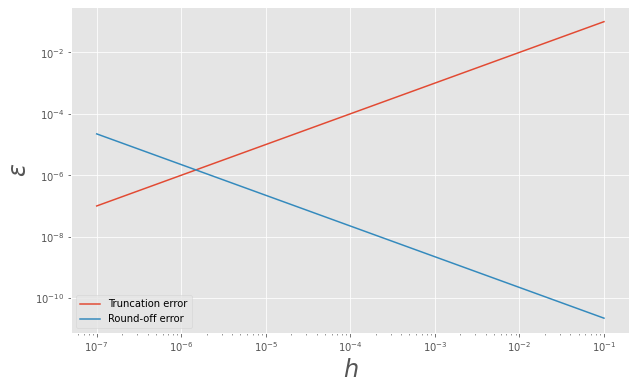

In [4]:
plt.figure()
plt.loglog(h,eps_t,label='Truncation error')
plt.loglog(h,eps_ro,label='Round-off error')
plt.legend(loc='lower left')
plt.xlabel(r'$h$',size=24)
plt.ylabel(r'$\epsilon$',size=24)

Note that this is a *log-log* plot, meaining that both the $x$ and $y$ axes are logarithmic. We'll almost always use these plots when we investigate the error properties of algorithms because they have the neat property that *power law* relationships like $y = x^b$ will be *straight lines* on them. Furthermore, the slope of the line on the log-log plot is equal to the exponent $b$ of the power law you started with! 


In the cell below, recreate the above plot, but add a third line that is the *total error*, $\epsilon_t + \epsilon_{ro}$.

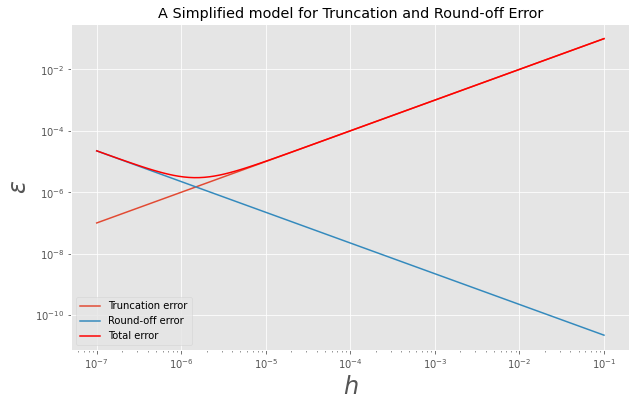

In [5]:
eps_total = eps_t + eps_ro # total error
plt.figure()
plt.loglog(h,eps_t,label='Truncation error')
plt.loglog(h,eps_ro,label='Round-off error')
plt.loglog(h,eps_total,label='Total error', color= 'red')
plt.legend(loc='lower left')
plt.xlabel(r'$h$',size=24)
plt.ylabel(r'$\epsilon$',size=24)
plt.title("A Simplified model for Truncation and Round-off Error")
plt.show()

Now, using your plot, if this simple model holds, how should you choose your stepsize such that the *total error is minimized*? Hopefully you see that the error is minimized when $\epsilon_t \simeq \epsilon_{ro}$!

Now, let's consider the roundoff error first. For any derivative approximation we have considered, we have something in the form of 

$$\frac{f(x+h) - f(x)}{h}$$

as $h$ becomes small, eventually the subtractive cancellation will lead to the numerator $f(x+h) - f(x) \to \epsilon_m$. So, the round off error will eventually be 

$$\epsilon_{ro} \simeq \frac{\epsilon_m}{h},$$

exactly as our simple model predicted! 

Because we are deriving our differentiation methods from Taylor series, we have an exact form of the truncation error. For the forward difference, it's $\epsilon_t = h f''(x)/2$ (verify this!) and for the central difference it's $\epsilon_t = h^2 f'''(x)/24$.

To find the minimum error, set $\epsilon_{ro} = \epsilon_{t}$ and solve for $h_{f}$ and $h_{cd}$ for the forward and central differences respectively. Do this on a piece of paper by hand, and typeset the answers you get in the cell below.

Note $\epsilon_t$ is the truncation error which has to do with the rounding errors we make with the Taylor Series we use.

Verifying $\epsilon_{t} = h f''(x)/2$ for the forward difference:
$$\epsilon_{t} =bh = \frac{ h f''(x)}{2}$$
$$bh =  \frac{h}{2}\frac{d(2bx)}{dx}$$
$$bh =  \frac{h}{2}2b$$
$$bh =  bh$$
$$\epsilon_{t} = h f''(x)/2$$

Finding minimum error for forward difference (when $\epsilon_{ro} = \epsilon_{t}$):
$$\frac{\epsilon_m}{h_f} = \frac{h_ff''(x)}{2}$$
$$h_f^2 = \frac{2\epsilon_m}{f''(x)}$$
$$h_f = \pm \sqrt{\frac{2\epsilon_m}{f''(x)}}$$

Finding minimum error for central difference (when $\epsilon_{ro} = \epsilon_{t}$):
$$\frac{\epsilon_m}{h_{cd}} = \frac{h_{cd}^2f'''(x)}{24}$$
$$h_{cd}^3 = \frac{24\epsilon_m}{f'''(x)}$$
$$h_{cd} = \pm \sqrt[3]{\frac{24\epsilon_m}{f'''(x)}}$$



### Interlude: numpy tricks to make your life easier

We've been relying on `for` loops to work with `numpy` arrays in an element-by-element fashion. Remembering that `x[i]` is the i-th number in an array, we've been doing things like

```
x = np.linspace(1,10,100)
g = np.zeros(10)
for i,v in enumerate(x):
    g[i] = x**2
```

But, we can do most basic math without these loops! This is not only easier to type, it's also MUCH faster, as we'll see later in the week. 

Even better is the fact that `numpy` functions like `np.cos` and `np.exp` can *take* a numpy array and will *return* a numpy array of the same length with each element of the input array fed into the function:

In [6]:
x = np.linspace(0,2*np.pi,10,endpoint=False) # note the endpoint=False does just what you think: it won't compute 2*pi, spacing the grid of numbers appropriately
y = np.cos(x)

In [7]:
print("x = ",x)
print("y = ",y)

x =  [0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265
 3.76991118 4.39822972 5.02654825 5.65486678]
y =  [ 1.          0.80901699  0.30901699 -0.30901699 -0.80901699 -1.
 -0.80901699 -0.30901699  0.30901699  0.80901699]


With this trick, we can write the forward and central differences in a very compact way:

`FD = (f(x+h) - f(x))/h`

`CD = (f(x+h/2) - f(x - h/2))/h`

below, I've coded the forward difference so that it takes a *numpy function* `f` and a stepsize `h` and returns a *numpy array* (please make sure you understand the difference!) containing the approximate derivative:

In [9]:
def fd(f,x,h):
    return (f(x+h)-f(x))/h

try it on `np.cos`:

In [10]:
x = np.linspace(0,2*np.pi,100,endpoint=False) # note the endpoint=False does just what you think: it won't compute 2*pi, spacing the grid of numbers appropriately
h = 0.01

g = fd(np.cos,x,h)

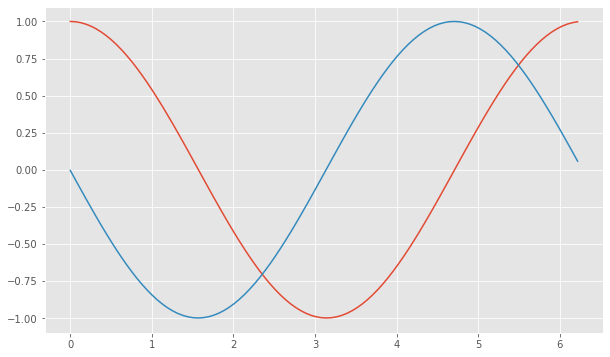

In [11]:
plt.figure()
plt.plot(x,np.cos(x),label='f')
plt.plot(x,g,label='df/dx')



Since we of course know that $f'(x) = -sin(x)$ this looks pretty good!

### Exercise

Now, on your own, code up a function to compute the central difference.

Use the forward and central differences to differentiate `np.cos` and `np.exp` for `x = 0.1, 1.0, 100.`. 

Print out the derivative and its relative error $\mathcal{E} = |f'_{computed}(x) - f'(x)|/f'(x)$ compared to the analytic forms $f'(x)$ (which you should also compute by hand) as a function of $h$. Reduce $h$ until you reach machine precision.

Plot a log-log plot of $\mathcal{E}$ vs $h$. Can you identify where truncation error dominates? Where round off dominates? Does this match with your model expectations?

rel_error_fd =  [-8.68001641e-04 -3.77346475e-03 -7.61177673e-03 -2.95146938e-03
 -6.63140160e-03 -1.84707953e-03 -2.83913173e-03 -1.67373775e-03
 -3.51961435e-03 -2.07592310e-03 -1.89534761e-03 -1.98696223e-03
 -1.59371631e-03 -1.52795707e-04 -3.11425652e-04 -9.90848942e-04
 -1.36157607e-03 -8.01492233e-04 -9.67272889e-04 -9.91092049e-04
 -2.18351120e-04 -1.36514737e-03 -3.40584118e-04 -9.87647462e-04
 -9.88533493e-04 -9.14776601e-04 -9.76778999e-05 -7.99329741e-04
 -2.75555224e-04 -4.34204639e-04 -4.18493467e-04 -2.16782076e-04
 -3.46430487e-04 -3.63532887e-05 -1.53192506e-04 -3.41118683e-04
 -2.90103471e-04 -9.92970458e-05 -1.14709871e-04 -2.03495290e-04
 -2.09869751e-04 -2.20430651e-04 -4.73307874e-06 -1.89216445e-04
 -1.75688864e-04 -1.98082061e-05 -2.25850776e-05 -3.57349083e-05
 -2.73599597e-05 -3.57321027e-05 -2.58698344e-05 -1.35134220e-05
 -3.99928338e-05 -7.14777455e-05 -2.35904520e-05 -5.66824428e-05
 -2.87042550e-05 -1.27809045e-05 -5.05566443e-05 -1.24337153e-05
 -1.21660

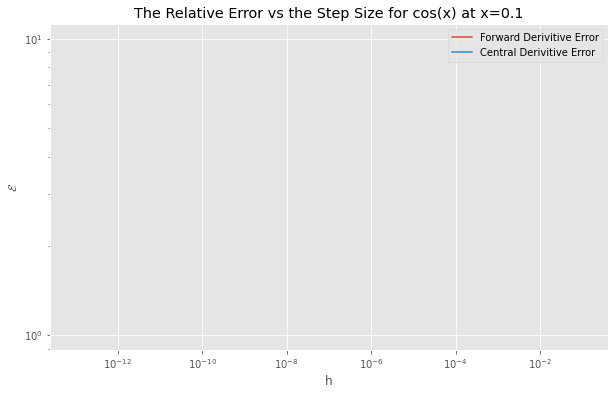

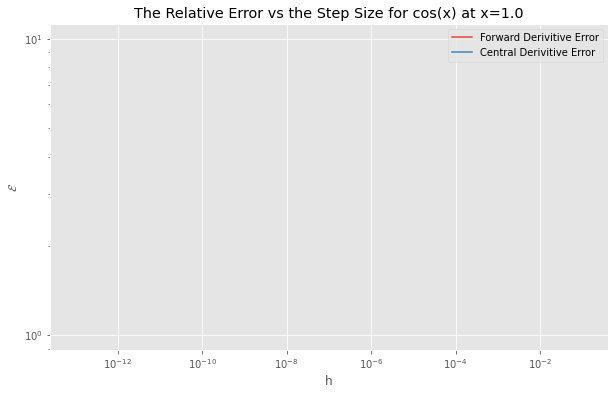

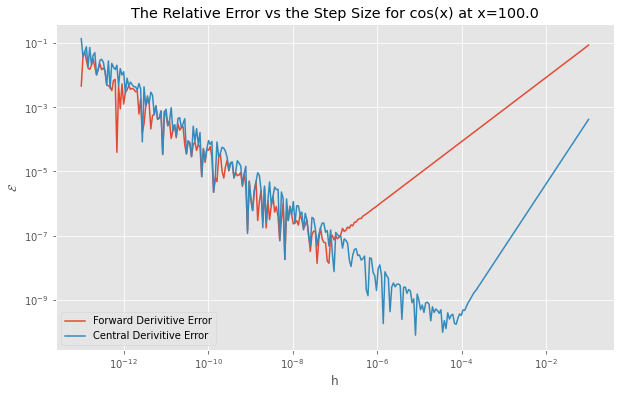

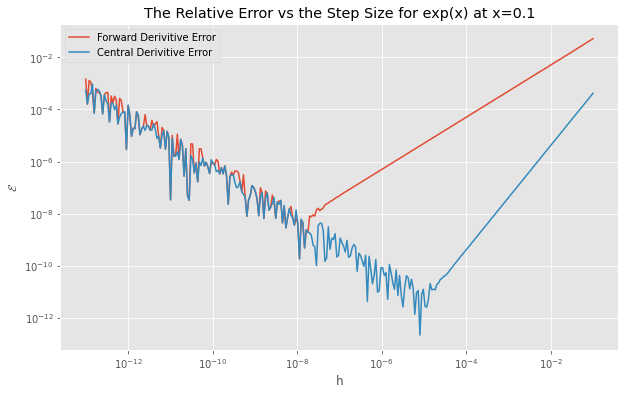

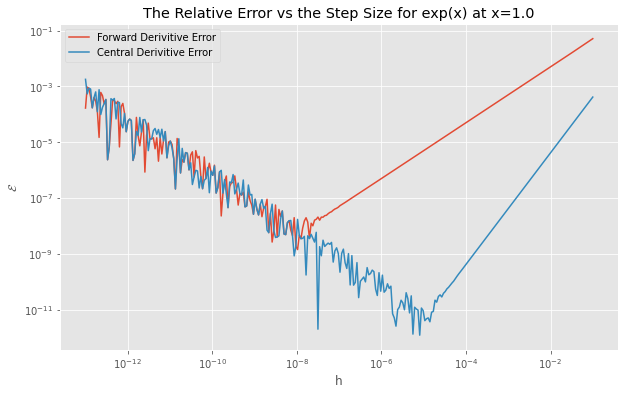

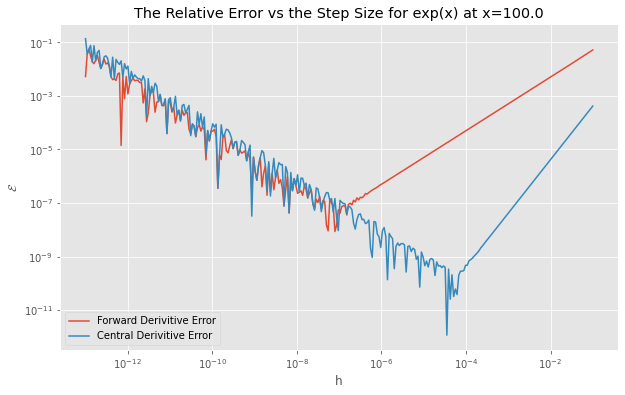

In [37]:
x_array = np.array([.1,1.0,100])
h_array = np.logspace(-13,-1,300)

def rel_err_func(computed, real):
    return abs(computed-real)/real

def cd(f,x,h):
    return (f(x+h/2)-f(x-h/2))/h

def neg_sin(x):
    return -1*np.sin(x)

f_array = np.array([np.exp,np.cos])  # the function we will use for derivitives
f_der_array = np.array([neg_sin, np.exp]) 
f_array_str = np.array(['cos(x)', 'exp(x)'])

for i in range(len(f_array)):
    for x in x_array:
        fd_der = fd(f_array[i],x,h_array)

        cd_der = cd(f_array[i],x,h_array)

        real_der = f_der_array[i](x)

        rel_err_fd = rel_err_func(fd_der, real_der)
        print("rel_error_fd = ", rel_err_fd)

        rel_err_cd = rel_err_func(cd_der, real_der)
        print("rel_error_cd = ", rel_err_cd)

        plt.loglog(h_array,rel_err_fd, label= "Forward Derivitive Error")
        plt.loglog(h_array,rel_err_cd, label= "Central Derivitive Error")
        #plt.ylim([10**(-12), .1])
        plt.xlabel("h")
        plt.ylabel("$\mathcal{E}$")
        plt.title("The Relative Error $\mathcal{E}$ vs the Step Size $h$ for " + str(f_array_str[i]) + " at x=" + str(x))
        plt.legend()
        plt.show()


